In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#UPDATE PATH HERE
PATH = "content/iwildcam-2019-fgvc6/"

In [4]:
os.listdir(PATH)

train_df = pd.read_csv(os.path.join(PATH, 'train.csv'))
test_df = pd.read_csv(os.path.join(PATH, 'test.csv'))

In [5]:
print(train_df.shape)
train_df.head()

(196299, 11)


,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,19,2011-05-13 23:43:18,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,1,5998cfa4-23d2-11e8-a6a3-ec086b02610b,33,Justin Brown,6f084ccc-5567-11e8-bc84-dca9047ef277,3,1024,747
1,19,2012-03-17 03:48:44,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,2,588a679f-23d2-11e8-a6a3-ec086b02610b,115,Justin Brown,6f12067d-5567-11e8-b3c0-dca9047ef277,3,1024,747
2,0,2014-05-11 11:56:46,59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg,1,59279ce3-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6faa92d1-5567-11e8-b1ae-dca9047ef277,1,1024,747
3,0,2013-10-06 02:00:00,5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg,1,5a2af4ab-23d2-11e8-a6a3-ec086b02610b,57,Erin Boydston,6f7d4702-5567-11e8-9e03-dca9047ef277,1,1024,747
4,0,2011-07-12 13:11:16,599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg,3,599fbd89-23d2-11e8-a6a3-ec086b02610b,46,Justin Brown,6f1728a1-5567-11e8-9be7-dca9047ef277,3,1024,747


In [6]:
print(test_df.shape)
test_df.head()

(153730, 10)


,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
0,03-Jan-2016 11:30:56,bce932f6-2bf6-11e9-bcad-06f10d5896c4.jpg,1,bce932f6-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
1,03-Jan-2016 11:30:57,bce932f7-2bf6-11e9-bcad-06f10d5896c4.jpg,2,bce932f7-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
2,03-Jan-2016 11:30:58,bce932f8-2bf6-11e9-bcad-06f10d5896c4.jpg,3,bce932f8-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
3,03-Jan-2016 11:30:59,bce932f9-2bf6-11e9-bcad-06f10d5896c4.jpg,4,bce932f9-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726
4,03-Jan-2016 11:31:00,bce932fa-2bf6-11e9-bcad-06f10d5896c4.jpg,5,bce932fa-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9ac61c-2e32-11e9-90ef-dca9047ef277,5,1024,726


There are 14 classes of images


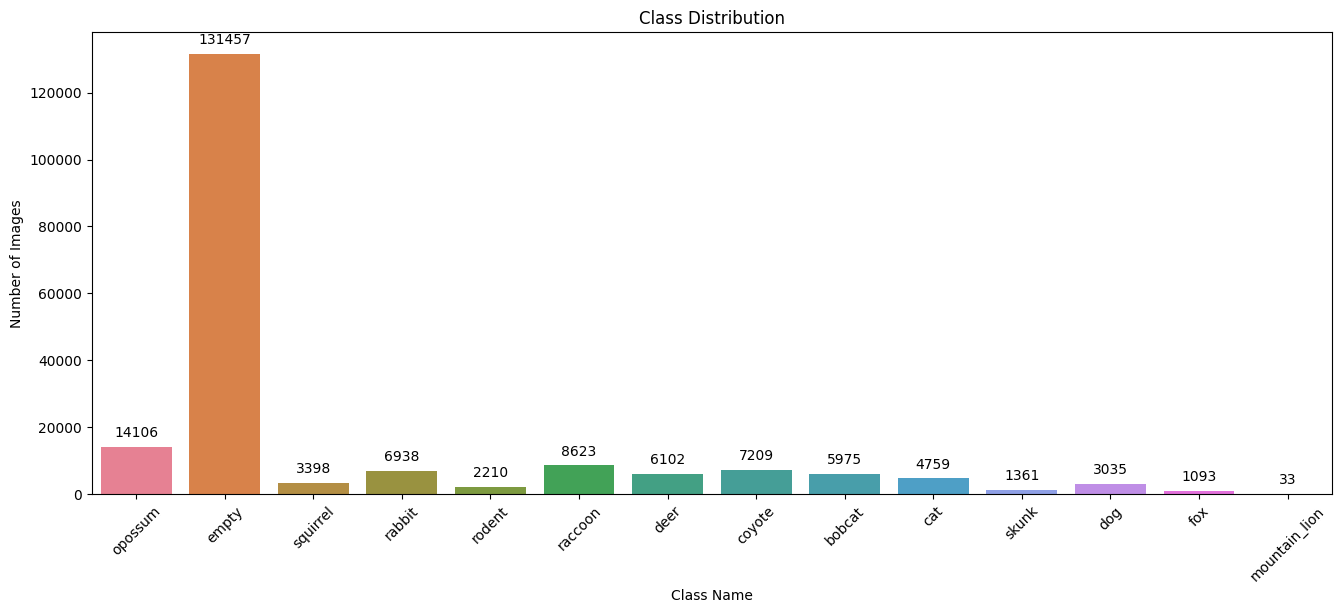

In [7]:
class_mapping = {
    0: 'empty', 1: 'deer', 2: 'moose', 3: 'squirrel', 4: 'rodent', 5: 'small_mammal',
    6: 'elk', 7: 'pronghorn_antelope', 8: 'rabbit', 9: 'bighorn_sheep', 10: 'fox',
    11: 'coyote', 12: 'black_bear', 13: 'raccoon', 14: 'skunk', 15: 'wolf', 16: 'bobcat',
    17: 'cat', 18: 'dog', 19: 'opossum', 20: 'bison', 21: 'mountain_goat', 22: 'mountain_lion'
}
train_df['class_name'] = train_df['category_id'].map(class_mapping)
unique_class_count = train_df['class_name'].nunique()
palette = sns.color_palette("husl", unique_class_count)
train_df['class_name'] = train_df['category_id'].map(class_mapping)
unique_class_count = train_df['class_name'].nunique()
print("There are {} classes of images".format(unique_class_count))

plt.figure(figsize=(16, 6))
ax = sns.countplot(data=train_df, x='class_name', palette=palette)
plt.title('Class Distribution')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()


Here, we observe that the data is skewed towards the empty category.

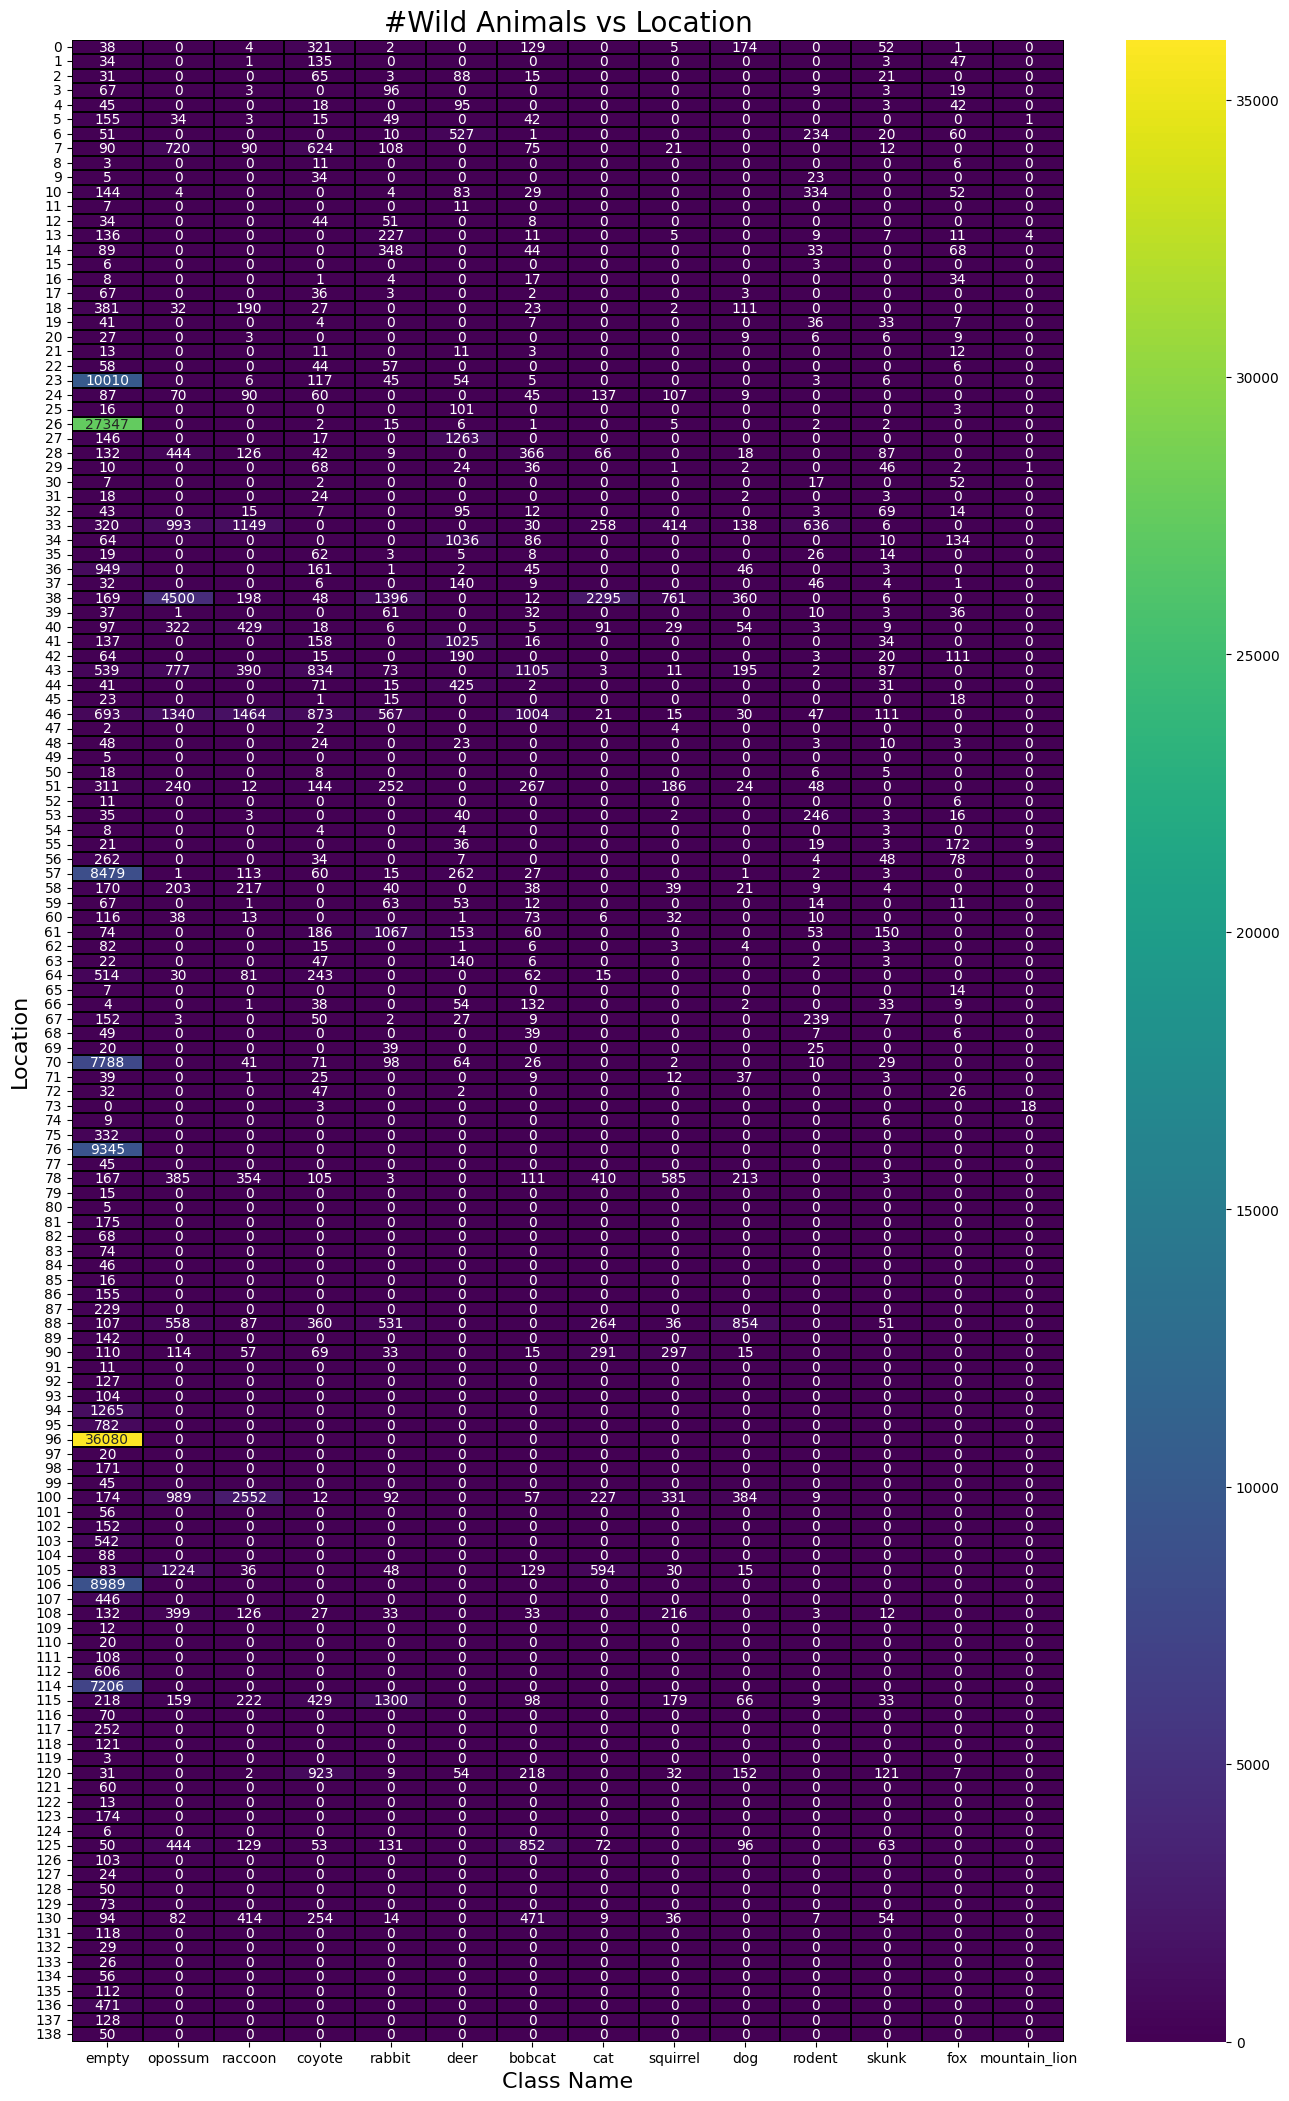

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 26))
class_location_counts = pd.DataFrame(train_df.groupby(['class_name', 'location'])['seq_id'].count().reset_index())
heatmap_data = class_location_counts.pivot(index='location', columns='class_name', values='seq_id')
heatmap_data = heatmap_data.reindex(heatmap_data.sum().sort_values(ascending=False).index, axis=1)
heatmap_data.fillna(0, inplace=True)

heatmap = sns.heatmap(heatmap_data, linewidths=0.1, linecolor='black', annot=True, fmt='.0f', cmap="viridis")

heatmap.set_title('#Wild Animals vs Location', size=20)
heatmap.set_xlabel('Class Name', size=16)
heatmap.set_ylabel('Location', size=16)
plt.yticks(rotation=0)
plt.show()

In [9]:
train_df['capture_datetime'] = pd.to_datetime(train_df['date_captured'], errors='coerce')
train_df["capture_day"] = train_df['capture_datetime'].dt.day
train_df["capture_hour"] = train_df['capture_datetime'].dt.hour
train_df["capture_minute"] = train_df['capture_datetime'].dt.minute
train_df["capture_year"] = train_df['capture_datetime'].dt.year
train_df["capture_month"] = train_df['capture_datetime'].dt.month

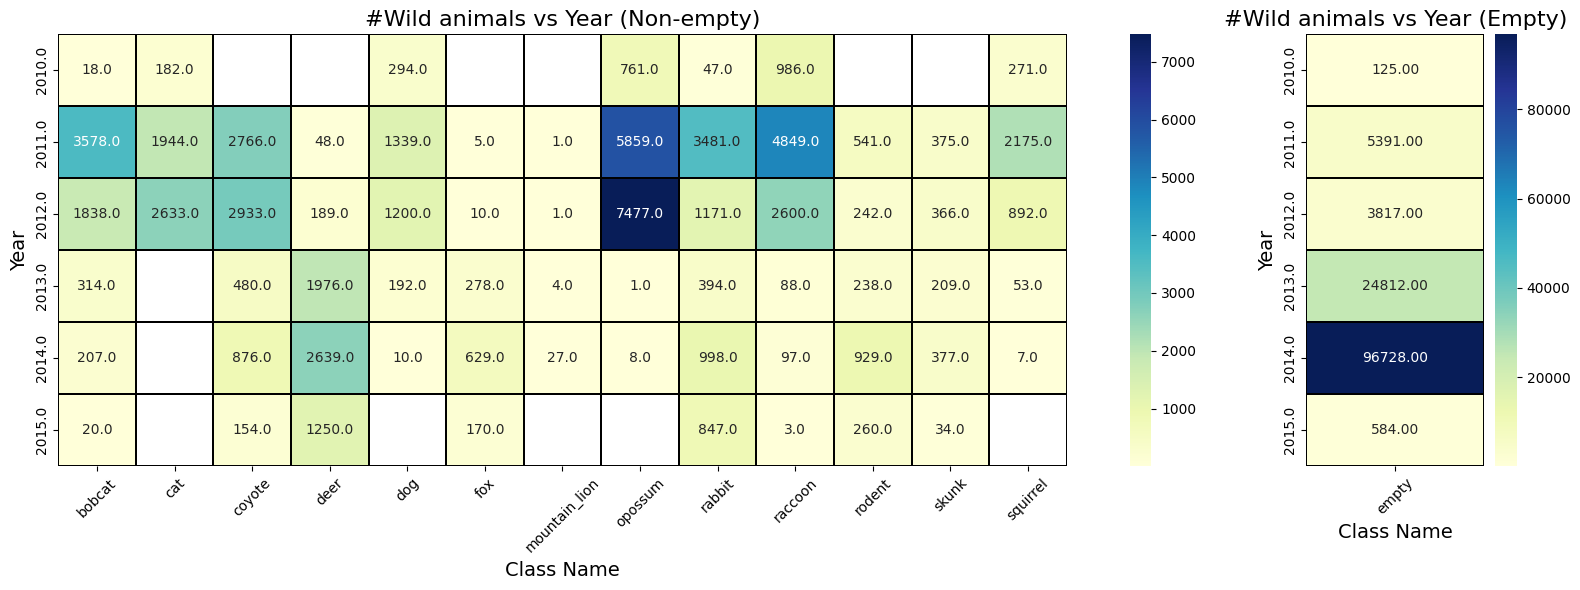

In [10]:

def plot_animals_per_year(train_df):
    # Plot for non-empty categories
    filtered_df_non_empty = train_df[train_df['class_name'] != 'empty']
    class_year_counts_non_empty = pd.DataFrame(filtered_df_non_empty.groupby(['class_name', 'capture_year'])['seq_id'].count().reset_index())
    heatmap_data_non_empty = class_year_counts_non_empty.pivot(index='capture_year', columns='class_name', values='seq_id')
    
    # Plot for empty category
    filtered_df_empty = train_df[train_df['class_name'] == 'empty']
    class_year_counts_empty = pd.DataFrame(filtered_df_empty.groupby(['class_name', 'capture_year'])['seq_id'].count().reset_index())
    heatmap_data_empty = class_year_counts_empty.pivot(index='capture_year', columns='class_name', values='seq_id')

    # Create subplots with relative widths
    fig = plt.figure(figsize=(16, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[0.85, 0.15])

    # Plot for non-empty categories
    ax1 = plt.subplot(gs[0])
    sns.heatmap(heatmap_data_non_empty, ax=ax1, linewidths=0.1, linecolor='black', annot=True, fmt='.1f', cmap="YlGnBu")
    ax1.set_title('#Wild animals vs Year (Non-empty)', size=16)
    ax1.set_xlabel('Class Name', size=14)
    ax1.set_ylabel('Year', size=14)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

    # Plot for empty category
    ax2 = plt.subplot(gs[1])
    sns.heatmap(heatmap_data_empty, ax=ax2, linewidths=0.1, linecolor='black', annot=True, fmt='.2f', cmap="YlGnBu")
    ax2.set_title('#Wild animals vs Year (Empty)', size=16)
    ax2.set_xlabel('Class Name', size=14)
    ax2.set_ylabel('Year', size=14)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

# Call the function for capture_year
plot_animals_per_year(train_df)


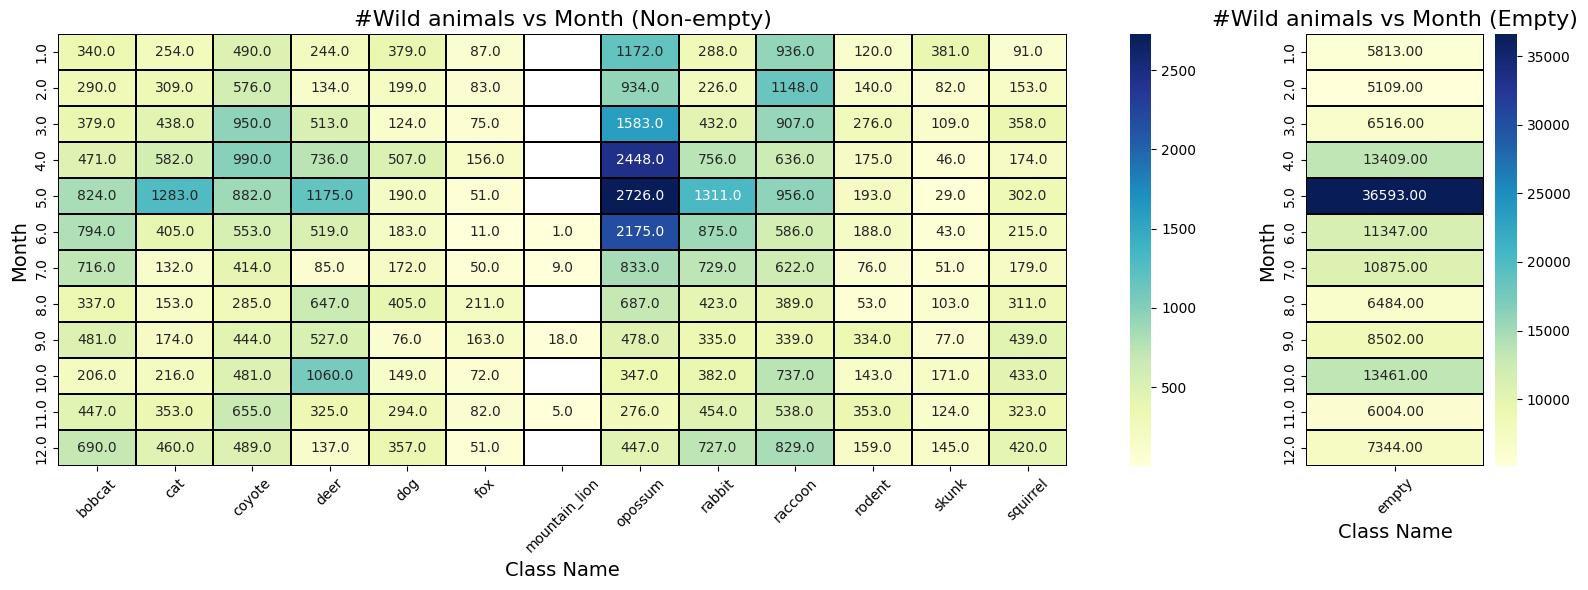

In [11]:
def plot_animals_per_month(train_df):
    # Plot for non-empty categories
    filtered_df_non_empty = train_df[train_df['class_name'] != 'empty']
    class_month_counts_non_empty = pd.DataFrame(filtered_df_non_empty.groupby(['class_name', 'capture_month'])['seq_id'].count().reset_index())
    heatmap_data_non_empty = class_month_counts_non_empty.pivot(index='capture_month', columns='class_name', values='seq_id')
    
    # Plot for empty category
    filtered_df_empty = train_df[train_df['class_name'] == 'empty']
    class_month_counts_empty = pd.DataFrame(filtered_df_empty.groupby(['class_name', 'capture_month'])['seq_id'].count().reset_index())
    heatmap_data_empty = class_month_counts_empty.pivot(index='capture_month', columns='class_name', values='seq_id')

    # Create subplots with relative widths
    fig = plt.figure(figsize=(16, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[0.85, 0.15])

    # Plot for non-empty categories
    ax1 = plt.subplot(gs[0])
    sns.heatmap(heatmap_data_non_empty, ax=ax1, linewidths=0.1, linecolor='black', annot=True, fmt='.1f', cmap="YlGnBu")
    ax1.set_title('#Wild animals vs Month (Non-empty)', size=16)
    ax1.set_xlabel('Class Name', size=14)
    ax1.set_ylabel('Month', size=14)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

    # Plot for empty category
    ax2 = plt.subplot(gs[1])
    sns.heatmap(heatmap_data_empty, ax=ax2, linewidths=0.1, linecolor='black', annot=True, fmt='.2f', cmap="YlGnBu")
    ax2.set_title('#Wild animals vs Month (Empty)', size=16)
    ax2.set_xlabel('Class Name', size=14)
    ax2.set_ylabel('Month', size=14)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

# Call the function for capture_month
plot_animals_per_month(train_df)


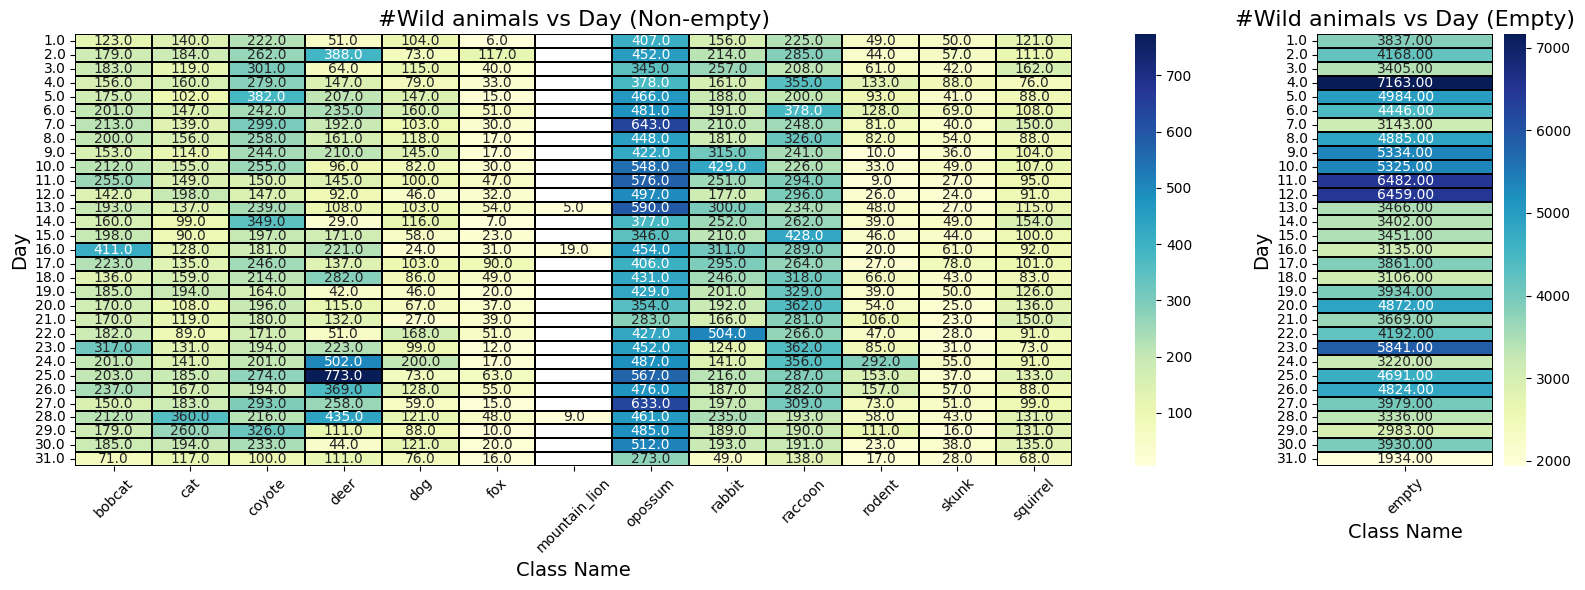

In [12]:
def plot_animals_per_day(train_df):
    # Plot for non-empty categories
    filtered_df_non_empty = train_df[train_df['class_name'] != 'empty']
    class_day_counts_non_empty = pd.DataFrame(filtered_df_non_empty.groupby(['class_name', 'capture_day'])['seq_id'].count().reset_index())
    heatmap_data_non_empty = class_day_counts_non_empty.pivot(index='capture_day', columns='class_name', values='seq_id')
    
    # Plot for empty category
    filtered_df_empty = train_df[train_df['class_name'] == 'empty']
    class_day_counts_empty = pd.DataFrame(filtered_df_empty.groupby(['class_name', 'capture_day'])['seq_id'].count().reset_index())
    heatmap_data_empty = class_day_counts_empty.pivot(index='capture_day', columns='class_name', values='seq_id')

    # Create subplots with relative widths
    fig = plt.figure(figsize=(16, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[0.85, 0.15])

    # Plot for non-empty categories
    ax1 = plt.subplot(gs[0])
    sns.heatmap(heatmap_data_non_empty, ax=ax1, linewidths=0.1, linecolor='black', annot=True, fmt='.1f', cmap="YlGnBu")
    ax1.set_title('#Wild animals vs Day (Non-empty)', size=16)
    ax1.set_xlabel('Class Name', size=14)
    ax1.set_ylabel('Day', size=14)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

    # Plot for empty category
    ax2 = plt.subplot(gs[1])
    sns.heatmap(heatmap_data_empty, ax=ax2, linewidths=0.1, linecolor='black', annot=True, fmt='.2f', cmap="YlGnBu")
    ax2.set_title('#Wild animals vs Day (Empty)', size=16)
    ax2.set_xlabel('Class Name', size=14)
    ax2.set_ylabel('Day', size=14)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

# Call the function for capture_day
plot_animals_per_day(train_df)


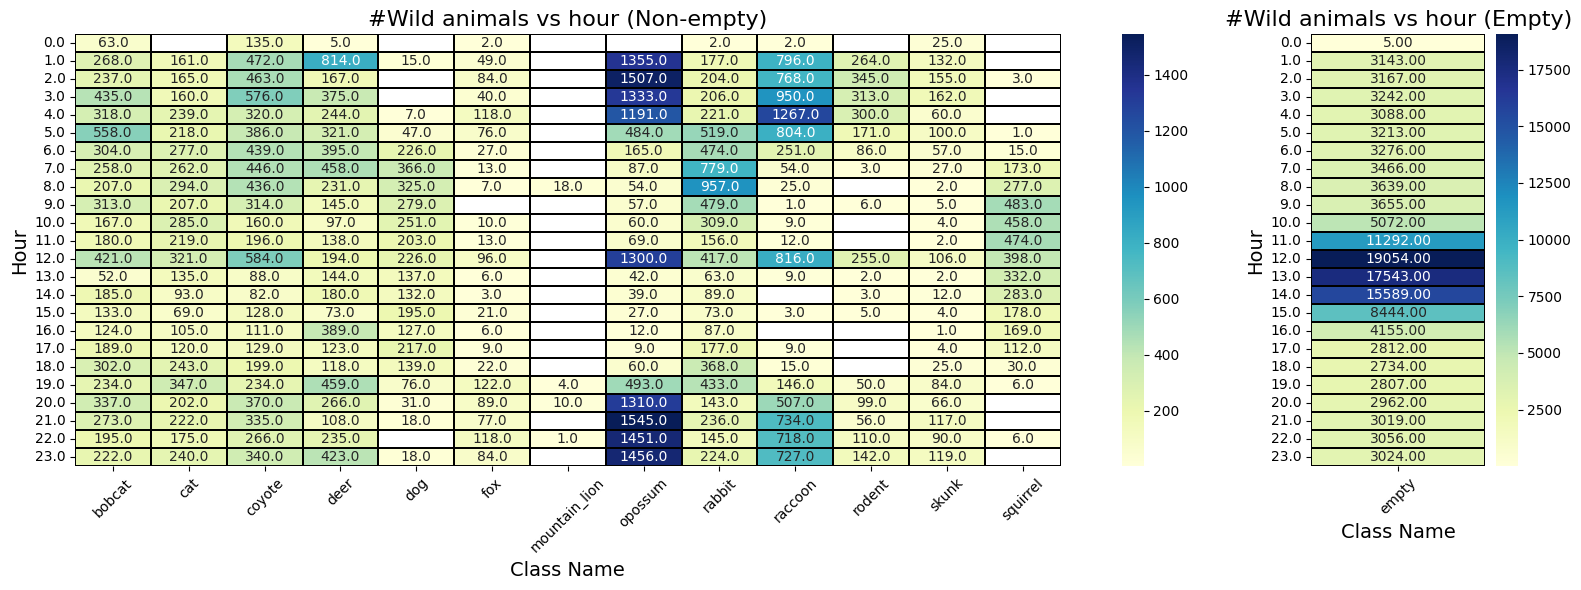

In [13]:
def plot_animals_per_hour(train_df):
    # Plot for non-empty categories
    filtered_df_non_empty = train_df[train_df['class_name'] != 'empty']
    class_hour_counts_non_empty = pd.DataFrame(filtered_df_non_empty.groupby(['class_name', 'capture_hour'])['seq_id'].count().reset_index())
    heatmap_data_non_empty = class_hour_counts_non_empty.pivot(index='capture_hour', columns='class_name', values='seq_id')
    
    # Plot for empty category
    filtered_df_empty = train_df[train_df['class_name'] == 'empty']
    class_hour_counts_empty = pd.DataFrame(filtered_df_empty.groupby(['class_name', 'capture_hour'])['seq_id'].count().reset_index())
    heatmap_data_empty = class_hour_counts_empty.pivot(index='capture_hour', columns='class_name', values='seq_id')

    # Create subplots with relative widths
    fig = plt.figure(figsize=(16, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[0.85, 0.15])

    # Plot for non-empty categories
    ax1 = plt.subplot(gs[0])
    sns.heatmap(heatmap_data_non_empty, ax=ax1, linewidths=0.1, linecolor='black', annot=True, fmt='.1f', cmap="YlGnBu")
    ax1.set_title('#Wild animals vs hour (Non-empty)', size=16)
    ax1.set_xlabel('Class Name', size=14)
    ax1.set_ylabel('Hour', size=14)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

    # Plot for empty category
    ax2 = plt.subplot(gs[1])
    sns.heatmap(heatmap_data_empty, ax=ax2, linewidths=0.1, linecolor='black', annot=True, fmt='.2f', cmap="YlGnBu")
    ax2.set_title('#Wild animals vs hour (Empty)', size=16)
    ax2.set_xlabel('Class Name', size=14)
    ax2.set_ylabel('Hour', size=14)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

# Call the function with the train_df
plot_animals_per_hour(train_df)

Here, animals like opossums and raccoons tend to appear more frequently during the night.
Also, concentration of empty values is more during noon.

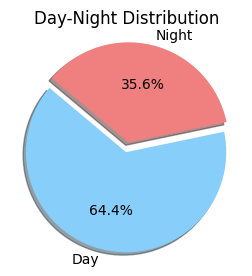

In [14]:
# Define day and night observations
night = ((train_df['capture_hour'] > 19) | (train_df['capture_hour'] < 7)).sum()
day = len(train_df) - night

# Plot pie chart
plt.figure(figsize=(3, 3))
plt.pie([day, night], labels=['Day', 'Night'], colors=['lightskyblue', 'lightcoral'], autopct='%1.1f%%', explode=(0, 0.1), shadow=True, startangle=140)
plt.title('Day-Night Distribution')
plt.axis('equal')
plt.show()

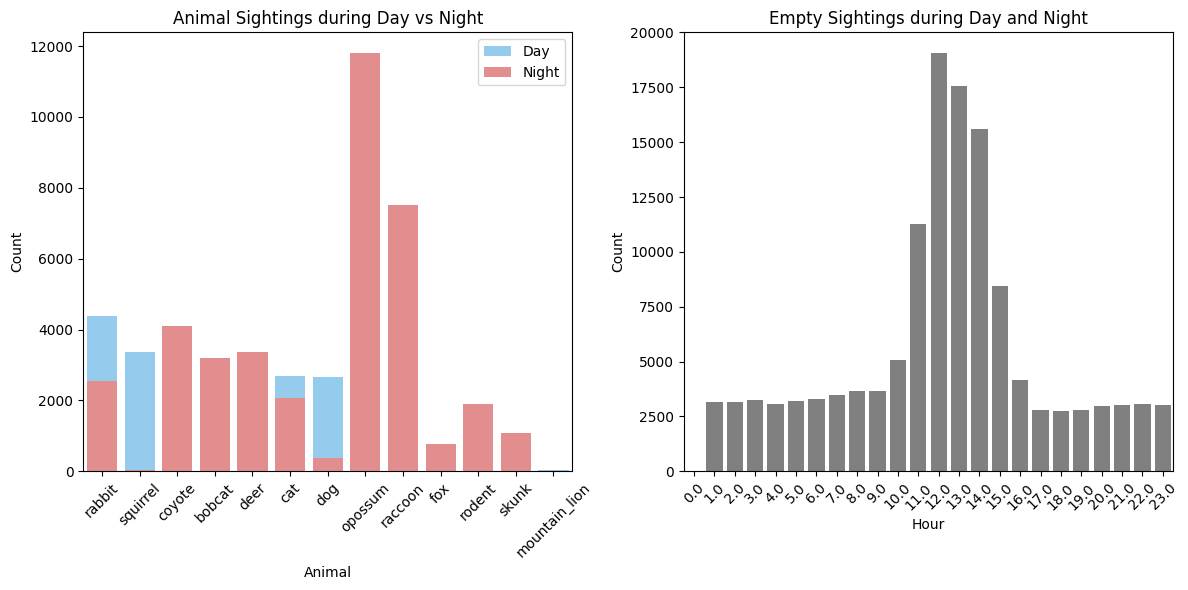

In [15]:
# Define day and night observations
night = ((train_df['capture_hour'] > 19) | (train_df['capture_hour'] < 7))
day_non_empty = train_df[~night & (train_df['class_name'] != 'empty')]['class_name']
night_non_empty = train_df[night & (train_df['class_name'] != 'empty')]['class_name']

# Count occurrences of each non-empty animal during day and night
day_non_empty_counts = day_non_empty.value_counts()
night_non_empty_counts = night_non_empty.value_counts()

# Merge counts into a single DataFrame
non_empty_animal_counts = pd.concat([day_non_empty_counts, night_non_empty_counts], axis=1, keys=['Day', 'Night']).fillna(0)

plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.barplot(x=non_empty_animal_counts.index, y=non_empty_animal_counts['Day'], color='lightskyblue', label='Day')
sns.barplot(x=non_empty_animal_counts.index, y=non_empty_animal_counts['Night'], color='lightcoral', label='Night')
plt.title('Animal Sightings during Day vs Night')
plt.xlabel('Animal')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(122)
empty_animals = train_df[train_df['class_name'] == 'empty']['capture_hour']
empty_counts = empty_animals.value_counts()
sns.barplot(x=empty_counts.index, y=empty_counts.values, color='gray')
plt.title('Empty Sightings during Day and Night')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
